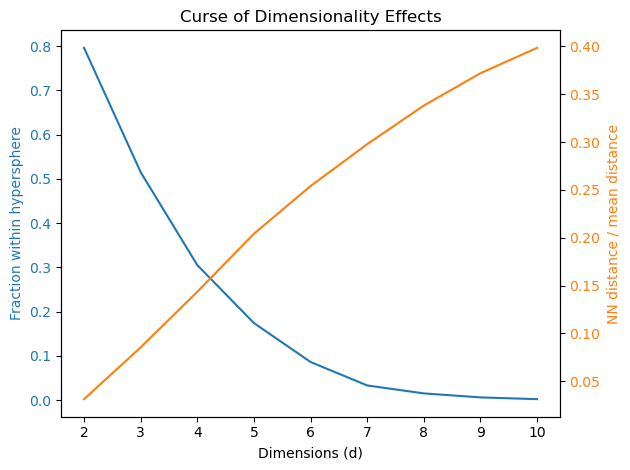

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# Set the number of random data points and dimensions to test
num_points = 1000
dimensions = range(2, 11)

# Arrays to store results for plotting
fractions_in_hypersphere = []
nn_distance_ratios = []

# Loop over dimensions
for d in dimensions:
    # Generate random data points uniformly in [-1, 1] in d dimensions
    points = np.random.uniform(-1, 1, size=(num_points, d))
    
    # Calculate distances to the origin
    origin = np.zeros(d)
    distances_to_origin = np.linalg.norm(points - origin, axis=1)
    
    # Calculate fraction of points within the unit hypersphere (distance <= 1)
    fraction_within_hypersphere = np.sum(distances_to_origin <= 1) / num_points
    fractions_in_hypersphere.append(fraction_within_hypersphere)
    
    # Calculate the distance matrix (pairwise distances between points)
    dist_matrix = distance_matrix(points, points)
    
    # Find the mean distance between all points
    mean_pairwise_distance = np.mean(dist_matrix[np.triu_indices(num_points, k=1)])
    
    # Find the nearest neighbor distances for each point
    np.fill_diagonal(dist_matrix, np.inf)  # Ignore self-distances
    nearest_neighbor_distances = np.min(dist_matrix, axis=1)
    
    # Calculate the mean nearest-neighbor distance
    mean_nn_distance = np.mean(nearest_neighbor_distances)
    
    # Compute the ratio of the mean nearest-neighbor distance to the mean pairwise distance
    nn_distance_ratio = mean_nn_distance / mean_pairwise_distance
    nn_distance_ratios.append(nn_distance_ratio)

# Plot the results
fig, ax1 = plt.subplots()

# Plot the fraction of points within the unit hypersphere
ax1.set_xlabel('Dimensions (d)')
ax1.set_ylabel('Fraction within hypersphere', color='tab:blue')
ax1.plot(dimensions, fractions_in_hypersphere, color='tab:blue', label='Fraction in hypersphere')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the nearest-neighbor distance ratio
ax2 = ax1.twinx()
ax2.set_ylabel('NN distance / mean distance', color='tab:orange')
ax2.plot(dimensions, nn_distance_ratios, color='tab:orange', label='NN distance ratio')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Show the plots
plt.title('Curse of Dimensionality Effects')
fig.tight_layout()
plt.show()
